In [ ]:
#옵튜나 임포트
!pip install optuna

In [ ]:
#시각화 한글 install
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#출처: https://giveme-happyending.tistory.com/192 [소연의_개발일지:티스토리]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [ ]:
#나눔 고딕 적용
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
#출처: https://giveme-happyending.tistory.com/192 [소연의_개발일지:티스토리]

In [ ]:
#개인 드라이브 임포트
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import optuna #옵튜나
from sklearn.preprocessing import LabelEncoder #라벨 인코딩
from sklearn.preprocessing import OneHotEncoder #원핫 인코딩
from sklearn.model_selection import cross_val_score #크로스벨리데이션
from sklearn.metrics import accuracy_score# 정확도
from sklearn.model_selection import GridSearchCV#그리트 서치
from sklearn.model_selection import RandomizedSearchCV#랜덤 그리드 서치
#k-fold
from sklearn.model_selection import KFold#
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


import joblib#피클

#모델
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn.ensemble import RandomForestClassifier#랜덤포레스트
from lightgbm import LGBMClassifier#
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
#판다스,넘파이
import pandas as pd
import numpy as np

In [ ]:
#테스트 데이터 로딩
# path = "/content/MyDrive/MyDrive/csv_file/ml_data_final2.csv"
#path = '/content/MyDrive/MyDrive/csv_file/ml_data_statistics_add.csv'
path = '/content/MyDrive/MyDrive/csv_file/ml_data_total.csv'
data = pd.read_csv(path,encoding='utf-8',index_col=0)
data.head()

,브랜드_라벨링,브랜드 좋아요 수,브랜드_카테고리_인코딩,리뷰_평균,word_score,총조회수_평균,총구매수_평균,브랜드_구매_성별,브랜드_조회_성별,원가,...,최소_리뷰수,중앙값_리뷰수,최대_총조회수,최소_총조회수,중앙값_총조회수,최대_총구매수,최소_총구매수,중앙값_총구매수,총구매수,판매량등급
0,464,160502,3,408.177778,2.042811,15433.400000,1313.0,1,1,53000.0,...,0.0,30.0,206455.0,160.0,2804.0,26174.0,27.0,123.0,26174.0,0.0
1,153,734049,2,854.797297,1.976542,4996.166667,954.0,1,1,33900.0,...,0.0,146.0,67763.0,372.0,3248.0,16459.0,24.0,363.0,16346.0,0.0
2,153,734049,2,854.797297,1.976542,4996.166667,954.0,1,1,33900.0,...,0.0,146.0,67763.0,372.0,3248.0,16459.0,24.0,363.0,16459.0,0.0
3,433,168392,9,676.978723,2.203081,9394.127660,964.0,1,1,76800.0,...,0.0,25.0,90012.0,209.0,2595.0,10687.0,20.0,93.0,10687.0,0.0
4,345,47855,9,2122.320000,2.305748,10857.400000,1925.0,0,0,62000.0,...,3.0,556.0,36683.0,1375.0,6644.0,10954.0,36.0,1001.0,10954.0,0.0


In [ ]:
# null값 확인
for col in data.columns:
    print(str(col)+":", data.loc[:,col].isnull().sum()/ len(data))

브랜드_라벨링: 0.0
브랜드 좋아요 수: 0.0
브랜드_카테고리_인코딩: 0.0
리뷰_평균: 0.0
word_score: 0.0
총조회수_평균: 0.0
총구매수_평균: 0.0
브랜드_구매_성별: 0.0
브랜드_조회_성별: 0.0
원가: 0.0
할인가: 0.0
할인율: 0.0
제목태그점수: 0.0
rgb_1: 0.0
rgb_2: 0.0
rgb_tf: 0.0
컬러_encoded: 0.0
사이즈 수: 0.0
human_ditect: 0.0
스타일샷_유무: 0.0
최대_리뷰수: 0.0
최소_리뷰수: 0.0
중앙값_리뷰수: 0.0
최대_총조회수: 0.0
최소_총조회수: 0.0
중앙값_총조회수: 0.0
최대_총구매수: 0.0
최소_총구매수: 0.0
중앙값_총구매수: 0.0
총구매수: 0.0
판매량등급: 0.0


In [ ]:
#데이터 요약
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 0 to 3789
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   브랜드_라벨링       3786 non-null   int64  
 1   브랜드 좋아요 수     3786 non-null   int64  
 2   브랜드_카테고리_인코딩  3786 non-null   int64  
 3   리뷰_평균         3786 non-null   float64
 4   word_score    3786 non-null   float64
 5   총조회수_평균       3786 non-null   float64
 6   총구매수_평균       3786 non-null   float64
 7   브랜드_구매_성별     3786 non-null   int64  
 8   브랜드_조회_성별     3786 non-null   int64  
 9   원가            3786 non-null   float64
 10  할인가           3786 non-null   float64
 11  할인율           3786 non-null   float64
 12  제목태그점수        3786 non-null   float64
 13  rgb_1         3786 non-null   int64  
 14  rgb_2         3786 non-null   int64  
 15  rgb_tf        3786 non-null   int64  
 16  컬러_encoded    3786 non-null   float64
 17  사이즈 수         3786 non-null   float64
 18  human_ditect  3786 non-null   flo

In [ ]:
#컬럼 확인
ata.columns

Index(['브랜드_라벨링', '브랜드 좋아요 수', '브랜드_카테고리_인코딩', '리뷰_평균', 'word_score',
       '총조회수_평균', '총구매수_평균', '브랜드_구매_성별', '브랜드_조회_성별', '원가', '할인가', '할인율',
       '제목태그점수', 'rgb_1', 'rgb_2', 'rgb_tf', '컬러_encoded', '사이즈 수',
       'human_ditect', '스타일샷_유무', '최대_리뷰수', '최소_리뷰수', '중앙값_리뷰수', '최대_총조회수',
       '최소_총조회수', '중앙값_총조회수', '최대_총구매수', '최소_총구매수', '중앙값_총구매수', '총구매수',
       '판매량등급'],
      dtype='object')

In [ ]:
#쓰지않는 컬럼제거
def drop_feature(data):
    data.drop( ["브랜드_라벨링",'총구매수','브랜드_구매_성별','human_ditect','rgb_tf','브랜드_카테고리_인코딩','최소_리뷰수','브랜드_조회_성별','rgb_2','원가'],axis=1, inplace=True )
    return data

# 받은 모델을 불러와서 사용: joblib.load(불러올모델파일경로)
def backup_pkl(model_path):
  backup = joblib.load(model_path)
  return backup

In [ ]:
#쓰지않는 컬럼 제거
data = drop_feature(data)
#독립변수와 종속변수를 분리
y_titanic = data.loc[:,"판매량등급"]
X_titanic = data.drop("판매량등급", axis=1)

In [ ]:


#트레인 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(
    X_titanic, # 트레인.
    y_titanic, # 테스트
    test_size = 0.2, # 테스트 비율
    random_state= 1000, # 랜덤 스테이트: 랜덤값을 고정해줌
    stratify = y_titanic
)


# 데이터 로드 및 준비
# X = ...  # 특성 행렬
# y = ...  # 타겟 벡터

# 랜덤 오버샘플링 적용
smote = SMOTE(random_state=42)
X_train, y_train  = smote.fit_resample(X_train1 , y_train1)

# ros = RandomOverSampler(random_state=42)
# X_train, y_train= ros.fit_resample(X_train1 , X_train1)

print(f'Original dataset shape {Counter( y_train1)}')
print(f'Resampled dataset shape {Counter(y_train )}')
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

# 아무 세팅을 안 하는 기본 모델을 가지고 baseline을 체크..
kfold = KFold( n_splits = 5, random_state=1000, shuffle=True)

print(y_train1.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

Original dataset shape Counter({6.0: 1325, 7.0: 1176, 5.0: 274, 4.0: 148, 3.0: 58, 2.0: 30, 1.0: 11, 0.0: 6})
Resampled dataset shape Counter({7.0: 1325, 6.0: 1325, 2.0: 1325, 4.0: 1325, 3.0: 1325, 5.0: 1325, 0.0: 1325, 1.0: 1325})
판매량등급
7.0    0.125
6.0    0.125
2.0    0.125
4.0    0.125
3.0    0.125
5.0    0.125
0.0    0.125
1.0    0.125
Name: proportion, dtype: float64
판매량등급
6.0    0.437995
7.0    0.389182
5.0    0.089710
4.0    0.048813
3.0    0.018470
2.0    0.010554
1.0    0.003958
0.0    0.001319
Name: proportion, dtype: float64
브랜드 좋아요 수  리뷰_평균       word_score  총조회수_평균      총구매수_평균  할인가      할인율   제목태그점수    rgb_1     컬러_encoded  사이즈 수  스타일샷_유무  최대_리뷰수   중앙값_리뷰수  최대_총조회수   최소_총조회수  중앙값_총조회수  최대_총구매수  최소_총구매수  중앙값_총구매수
115        4.333333    0.855641    392.75000    33.0     19000.0  0.72  1.730139  10783596  20.0        4.0    0.0      10.0     6.0      620.0     116.0    417.5     48.0     26.0     29.0        0.00033
123048     423.260870  2.042811    4405.26087   544.0    31

In [ ]:
#샘플링 관련 임포트
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
#오버 샘플링 ---> 종속변수의 분포가 정규성을 띄지 않고 한쪽에 치우쳐져있음
#-> 테스트 데이터를 오버샘플링해 학습

#스모트 샘플링
smote = SMOTE(random_state=42)
X_train, y_train  = smote.fit_resample(X_train1 , y_train1)

# 랜덤 오버샘플링 적용
# ros = RandomOverSampler(random_state=42)
# X_train, y_train= ros.fit_resample(X_train1 , X_train1)

print(f'Original dataset shape {Counter( y_train1)}')
print(f'Resampled dataset shape {Counter(y_train )}')


# 아무 세팅을 안 하는 기본 모델을 가지고 baseline을 체크..
kfold = KFold( n_splits = 5, random_state=1000, shuffle=True)

print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

In [ ]:
#데이터 분포 확인
print(X_train.shape)
print(X_val.shape)


(10600, 20)
(758, 20)


In [ ]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
def rf_objective( trail ) :
    #Test를 할 파라미터들에 대한 가변적인 범위를 설정!!!
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,3000),
        "criterion" : trail.suggest_categorical("criterion", ["gini","entropy","log_loss"]),
        "max_features":trail.suggest_int("max_features", 1, X_train.shape[1]),
        "max_depth":trail.suggest_int("max_depth", 1, 50),
        "min_samples_split":trail.suggest_int("min_samples_split", 2,30)
    }
    #세팅한 파라미터들 받을 함수!!!!

    rf = RandomForestClassifier(n_jobs=-1, random_state=1000,**paramas )
    # 그냥 통으로 학습한다면,,
    # CV를 한 결과를 바탕으로 하겠다.....
    scores = cross_val_score( rf,
                         X_train, y_train,
                        cv = kfold, scoring="accuracy")
    # cv=5에 대한 accuracy의 값이 존재!!!!
    # 저는 5번 시도 중에서 대표를 평균으로 하겠다..
    acc_mean = scores.mean()
    # 4) OPT를 할 값을 지정을 하게 됨!!!!!
    return acc_mean

#랜덤 포레스트 실행 코드
rf_study = optuna.create_study( direction="maximize")
# 공부의 방향성!!!!!!+ 내가 만든 목적함수의 Target!!!!

# 실제
rf_study.optimize(rf_objective, n_trials=50, n_jobs=-1 )
print(rf_study.best_trial.values)
print(rf_study.best_params)

In [ ]:
# anaconda를 사용해서 하면 기본 패키지 중 : joblib
import joblib
#최적 파라미터 지정
rf_kf_gs_best = rf_study.best_params

#모델 파라미터 피클 저장
joblib.dump(rf_kf_gs_best, "/content/MyDrive/MyDrive/csv_file/rf_kf_op_best_s1.pkl" )

[I 2024-05-19 15:31:38,616] A new study created in memory with name: no-name-6278163f-09f0-4372-9413-067a0ef2c6b2
[I 2024-05-19 15:34:31,250] Trial 0 finished with value: 0.610483849043883 and parameters: {'n_estimators': 2165, 'criterion': 'gini', 'max_features': 1, 'max_depth': 89, 'min_samples_split': 19}. Best is trial 0 with value: 0.610483849043883.
[I 2024-05-19 15:35:00,815] Trial 1 finished with value: 0.6315929121742487 and parameters: {'n_estimators': 1447, 'criterion': 'gini', 'max_features': 5, 'max_depth': 94, 'min_samples_split': 11}. Best is trial 1 with value: 0.6315929121742487.
[I 2024-05-19 15:35:11,732] Trial 0 finished with value: 0.6362133742204533 and parameters: {'n_estimators': 2529, 'criterion': 'gini', 'max_features': 9, 'max_depth': 45, 'min_samples_split': 13}. Best is trial 0 with value: 0.6362133742204533.
[I 2024-05-19 15:41:07,256] Trial 2 finished with value: 0.6329157627459616 and parameters: {'n_estimators': 2226, 'criterion': 'entropy', 'max_featur

[0.640167789431332]
{'n_estimators': 1636, 'criterion': 'entropy', 'max_features': 28, 'max_depth': 19, 'min_samples_split': 21}


In [ ]:
# + optuna 특징 중 하나가 시각화 ==> 테스트한 결과들에 대한 시각적인 정보 :RF
optuna.visualization.plot_optimization_history(rf_study)

In [ ]:
# 중요한 변수들의 범위!!!! :RF
optuna.visualization.plot_parallel_coordinate(rf_study)

In [ ]:
# + Target에 영향을 미친 변수들...:RF
optuna.visualization.plot_param_importances( rf_study)

In [ ]:
# anaconda를 사용해서 하면 기본 패키지 중 : joblib
import joblib
# rf_p = backup_pkl('/content/rf_musinsa_best.pkl')
#파라미터 지정
rf_p = rf_kf_gs_best

#랜덤포레스트 설정
opt_rf = RandomForestClassifier( n_jobs=-1,
                                random_state=1000,
                                 **rf_p)
# +++ 개인적으로 cv를 하셔도 되고, 어차피 cv를 통해서 나온
#     결과들이니, 그냥 통으로 학습을 해도 되고,,,선택!!!!!!
#모델 생성
opt_rf.fit(X_train, y_train)
# val평가
accuracy_score(y_val, opt_rf.predict(X_val))

0.6226912928759895

In [ ]:
#분류에 영향을 미친 주요변수 시각화
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.barh(X_train.columns, opt_rf.feature_importances_)
temp = pd.DataFrame(
    {
        "IF":opt_rf.feature_importances_
    },
    index = list(X_train.columns)
)
temp.sort_values( by="IF").plot(kind="barh")

NameError: name 'opt_rf' is not defined

In [ ]:
#xg_boost
from xgboost import XGBClassifier
def xg_objective( trail ) :
    # 1) Test를 할 파라미터들에 대한 가변적인 범위를 설정!!!
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate": trail.suggest_float("learning_rate",0.01,0.3),
        #"criterion" : trail.suggest_categorical("criterion", ["gini","entropy","log_loss"]),
        "max_features":trail.suggest_int("max_features", 1, X_train.shape[1]),
        "max_depth":trail.suggest_int("max_depth", 2,100),
        "min_child_weight":trail.suggest_int("min_child_weight", 2,40),
        "gamma":trail.suggest_float('gamma',0.0,0.3),
        "subsample":trail.suggest_float("subsample",0.1,0.9),# 가로에 대한 비율
        "colsample_bytree":trail.suggest_float("colsample_bytree",0.1,0.9),# 세로에 대한 비율
    }
    # 세팅한 파라미터들 받을 함수!!!!
    xgbc = XGBClassifier(n_jobs=-1, random_state=1000,**paramas)
    # 그냥 통으로 학습한다면,,
    #rf.fit(X_train, y_train)
    # CV를 한 결과를 바탕
    scores = cross_val_score( xgbc,
                         X_train, y_train,
                        cv = kfold, scoring="accuracy")
    # --> cv=5에 대한 accuracy의 값이 존재
    # 5번 시도 중에서 대표를 평균
    acc_mean = scores.mean()
    # 4) OPT를 할 값을 지정을 하게 됨!!!!!
    return acc_mean

#xgboost실행
xg_study = optuna.create_study( direction="maximize")
# 공부의 방향성!+ 목적함수의 Target

# 실제
xg_study.optimize(xg_objective, n_trials=100, n_jobs=-1 )
print(xg_study.best_trial.values)
print(xg_study.best_params)

In [ ]:
# anaconda를 사용해서 하면 기본 패키지 중 : joblib
import joblib
#파라미터 최적값 지정:XGB
xg_kf_gs_best = xg_study.best_params
joblib.dump(xg_kf_gs_best, "/content/MyDrive/MyDrive/pkl_file/xg_musinsa_best_s1.pkl" )

['/content/MyDrive/MyDrive/pkl_file/xg_musinsa_best_s1.pkl']

In [ ]:
# + optuna 특징 중 하나가 시각화:XGB
# ==> 테스트한 결과들에 대한 시각적인 정보:XGB
optuna.visualization.plot_optimization_history(xg_study)

In [ ]:
# 중요한 변수들의 범위: XGB
optuna.visualization.plot_parallel_coordinate(xg_study)

In [ ]:
# Target에 영향을 미친 변수들:XGB
optuna.visualization.plot_param_importances( xg_study)

In [ ]:
# anaconda를 사용해서 하면 기본 패키지 중 : joblib
import joblib
#xg_p = backup_pkl('/content/xg_musinsa_best.pkl')
#파라미터 지정
xg_p = xg_kf_gs_best
opt_xg = XGBClassifier( n_jobs=-1,
                                random_state=1000,
                                 **xg_p)
# 개인적으로 cv를 하셔도 되고, 어차피 cv를 통해서 나온
#     결과들이니, 그냥 통으로 학습을 해도 되고,,,선택!!!!!!
opt_xg.fit(X_train, y_train)
# val평가
accuracy_score(y_val, opt_xg.predict(X_val))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.




0.6029023746701847

<Axes: >

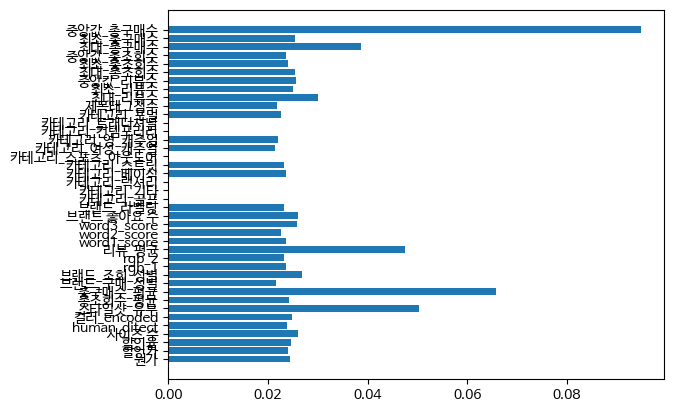

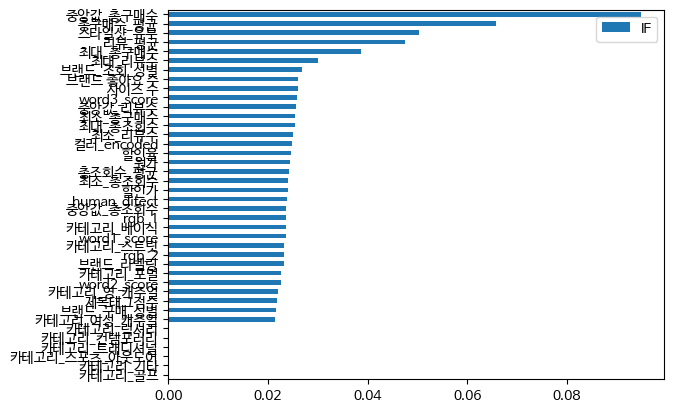

In [ ]:
#XGB 주요 피쳐 시각화

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.barh(X_train.columns, opt_xg.feature_importances_)
temp = pd.DataFrame(
    {
        "IF":opt_xg.feature_importances_
    },
    index = list(X_train.columns)
)
temp.sort_values( by="IF").plot(kind="barh")

In [ ]:
from lightgbm import LGBMClassifier
#light_gbm

def gbm_objective( trail ) :
    # 1) Test를 할 파라미터들에 대한 가변적인 범위를 설정!!!
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate": trail.suggest_float("learning_rate",0.01,0.3),
        "criterion" : trail.suggest_categorical("criterion", ["gini","entropy","log_loss"]),
        "max_features":trail.suggest_int("max_features", 1, X_train.shape[1]),
        "max_depth":trail.suggest_int("max_depth", 2,100),
        "min_samples_split":trail.suggest_int("min_samples_split", 2,40),
        "min_split_gain":trail.suggest_float("min_split_gain",0.0,0.1),
        "subsample":trail.suggest_float("subsample",0.1,0.9),# 가로에 대한 비율
        #"colsample_bytree":trail.suggest_float("colsample_bytree",0.1,0.9),# 세로에 대한 비율
        'colsample_bytree': trail.suggest_float("colsample_bytree", 0.1, 1),
        'min_child_samples':trail.suggest_int('min_child_samples',10,200),
    }
    # 2) 1번에 세팅한 파라미터들 받을 함수!!!!
    # ==> 직접 넘겨야 함!!!!!
    lgbc = LGBMClassifier(n_jobs=-1, random_state=1000,**paramas)
    # 3-1) 그냥 통으로 학습한다면,,
    #rf.fit(X_train, y_train)
    # 3-2) CV를 한 결과를 바탕으로 하겠다.....
    scores = cross_val_score( lgbc,
                         X_train, y_train,
                        cv = kfold, scoring="accuracy")
    # --> cv=5에 대한 accuracy의 값이 존재!!!!
    # 저는 5번 시도 중에서 대표를 평균으로 하겠다..
    acc_mean = scores.mean()
    # 4) OPT를 할 값을 지정을 하게 됨!!!!!
    return acc_mean

In [ ]:
gbm_study = optuna.create_study( direction="maximize")
# 공부의 방향성!!!!!!+ 내가 만든 목적함수의 Target!!!!

# 실제
gbm_study.optimize(gbm_objective, n_trials=20, n_jobs=-1 )
print(gbm_study.best_trial.values)
print(gbm_study.best_params)

[I 2024-05-22 02:57:10,474] A new study created in memory with name: no-name-fd64cdbf-436f-40db-9830-f56004637131
[I 2024-05-22 02:57:48,226] Trial 1 finished with value: 0.8831132075471698 and parameters: {'n_estimators': 159, 'learning_rate': 0.21072025270389666, 'criterion': 'entropy', 'max_features': 18, 'max_depth': 79, 'min_samples_split': 3, 'min_split_gain': 0.048757040240767546, 'subsample': 0.2086615162662538, 'colsample_bytree': 0.9488973724021511, 'min_child_samples': 49}. Best is trial 1 with value: 0.8831132075471698.
[I 2024-05-22 02:58:51,379] Trial 0 finished with value: 0.8841509433962264 and parameters: {'n_estimators': 815, 'learning_rate': 0.06790435223831641, 'criterion': 'gini', 'max_features': 4, 'max_depth': 94, 'min_samples_split': 30, 'min_split_gain': 0.0374105635135013, 'subsample': 0.5997534177178215, 'colsample_bytree': 0.5171820524608464, 'min_child_samples': 46}. Best is trial 0 with value: 0.8841509433962264.
[I 2024-05-22 02:59:02,215] Trial 2 finishe

[0.8895283018867925]
{'n_estimators': 518, 'learning_rate': 0.162743388168437, 'criterion': 'gini', 'max_features': 16, 'max_depth': 60, 'min_samples_split': 16, 'min_split_gain': 0.0002163194583630762, 'subsample': 0.32678427588256087, 'colsample_bytree': 0.7697665439145838, 'min_child_samples': 76}


In [ ]:
# anaconda를 사용해서 하면 기본 패키지 중 : joblib
import joblib
lgbm_kf_gs_best = gbm_study.best_params
#joblib.dump(lgbm_kf_gs_best, "/content/MyDrive/MyDrive/pkl_file/lgbm_musinsa_best_test_final_63.pkl" )

In [ ]:
lgbm_kf_gs_best

{'n_estimators': 518,
 'learning_rate': 0.162743388168437,
 'criterion': 'gini',
 'max_features': 16,
 'max_depth': 60,
 'min_samples_split': 16,
 'min_split_gain': 0.0002163194583630762,
 'subsample': 0.32678427588256087,
 'colsample_bytree': 0.7697665439145838,
 'min_child_samples': 76}

In [ ]:
# + optuna 특징 중 하나가 시각화!!!!!!
# ==> 테스트한 결과들에 대한 시각적인 정보!!! plotly기본
optuna.visualization.plot_optimization_history(gbm_study)

In [ ]:
# + 시각화2 ) 중요한 변수들의 범위!!!!
optuna.visualization.plot_parallel_coordinate(gbm_study)

In [ ]:
# + 시각화3 ) Target에 영향을 미친 변수들...
optuna.visualization.plot_param_importances( gbm_study)

In [ ]:
# anaconda를 사용해서 하면 기본 패키지 중 : joblib
import joblib
lgbm_p  = gbm_study.best_params
#lgbm_p = backup_pkl('/content/MyDrive/MyDrive/xg_kf_op_best.pkl')
opt_lgbm = LGBMClassifier( n_jobs=-1,
                                random_state=1000,
                                 **lgbm_p)
# +++ 개인적으로 cv를 하셔도 되고, 어차피 cv를 통해서 나온
#     결과들이니, 그냥 통으로 학습을 해도 되고,,,선택!!!!!!
opt_lgbm.fit(X_train, y_train)
# val평가
model_file_path = "/content/MyDrive/MyDrive/pkl_file/lgbm_musinsa_model.pkl"
joblib.dump(opt_lgbm, model_file_path)
y_pred = opt_lgbm.predict(X_val)
accuracy_score(y_val, y_pred)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 10600, number of used features: 20
[LightGBM] [Info] Start training from score -2.07

0.5976253298153035

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 정확도
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# 성과지표 계산
report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 컨퓨전 메트릭스 계산
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=opt_lgbm.classes_, columns=opt_lgbm.classes_)

# 결과 출력
print("Classification Report:")
print(report_df)

print("\nConfusion Matrix:")
print(conf_matrix_df)

# 결과를 DataFrame으로 반환
report_df, conf_matrix_df

Accuracy: 0.5976253298153035
Classification Report:
              precision    recall  f1-score     support
0.0            0.000000  0.000000  0.000000    1.000000
1.0            0.000000  0.000000  0.000000    3.000000
2.0            0.000000  0.000000  0.000000    8.000000
3.0            0.071429  0.071429  0.071429   14.000000
4.0            0.150000  0.081081  0.105263   37.000000
5.0            0.384615  0.367647  0.375940   68.000000
6.0            0.643646  0.701807  0.671470  332.000000
7.0            0.674912  0.647458  0.660900  295.000000
accuracy       0.597625  0.597625  0.597625    0.597625
macro avg      0.240575  0.233678  0.235625  758.000000
weighted avg   0.587722  0.597625  0.591493  758.000000

Confusion Matrix:
     0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
0.0    0    0    0    1    0    0    0    0
1.0    0    0    1    0    0    1    1    0
2.0    0    1    0    2    2    2    1    0
3.0    0    0    3    1    3    6    1    0
4.0    1    0    3    4    3   20    

(              precision    recall  f1-score     support
 0.0            0.000000  0.000000  0.000000    1.000000
 1.0            0.000000  0.000000  0.000000    3.000000
 2.0            0.000000  0.000000  0.000000    8.000000
 3.0            0.071429  0.071429  0.071429   14.000000
 4.0            0.150000  0.081081  0.105263   37.000000
 5.0            0.384615  0.367647  0.375940   68.000000
 6.0            0.643646  0.701807  0.671470  332.000000
 7.0            0.674912  0.647458  0.660900  295.000000
 accuracy       0.597625  0.597625  0.597625    0.597625
 macro avg      0.240575  0.233678  0.235625  758.000000
 weighted avg   0.587722  0.597625  0.591493  758.000000,
      0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
 0.0    0    0    0    1    0    0    0    0
 1.0    0    0    1    0    0    1    1    0
 2.0    0    1    0    2    2    2    1    0
 3.0    0    0    3    1    3    6    1    0
 4.0    1    0    3    4    3   20    4    2
 5.0    0    0    2    4   10   25   21    6


In [ ]:
# 검증 데이터에 대한 예측 및 정확도 평가
y_pred = opt_lgbm.predict(X_val)
print("검증 데이터 정확도:", accuracy_score(y_val, y_pred))

# 새로운 입력 값에 대한 예측
input_data = np.array(list(X_titanic.iloc[196,:])).reshape(1, -1)
new_data = input_data     # 새로운 입력 데이터를 리스트 형식으로 준비
new_pred = opt_lgbm.predict(new_data)

# 예측 결과 출력
print("새로운 입력 값에 대한 예측 결과:", new_pred[0])

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
검증 데이터 정확도: 0.5976253298153035
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
새로운 입력 값에 대한 예측 결과: 4.0


In [ ]:
int(new_pred[0])

4

In [ ]:
conf_matrix_df

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
0.0,0,0,0,1,0,0,0,0
1.0,0,0,1,0,1,1,0,0
2.0,0,2,0,2,1,2,1,0
3.0,0,0,5,2,2,4,1,0
4.0,0,0,3,4,4,20,5,1
5.0,0,0,2,2,13,24,20,7
6.0,0,1,1,1,2,9,233,85
7.0,0,0,0,0,0,4,97,194


<Axes: >

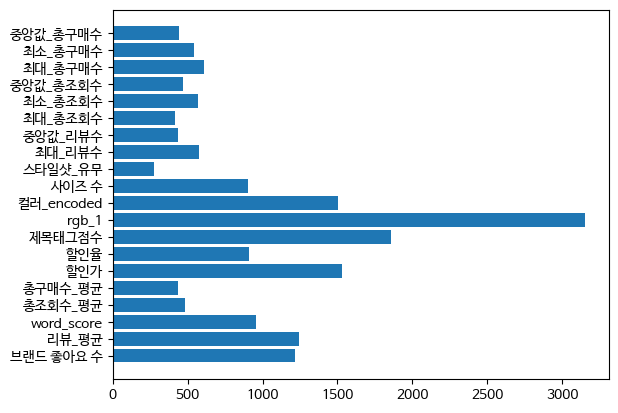

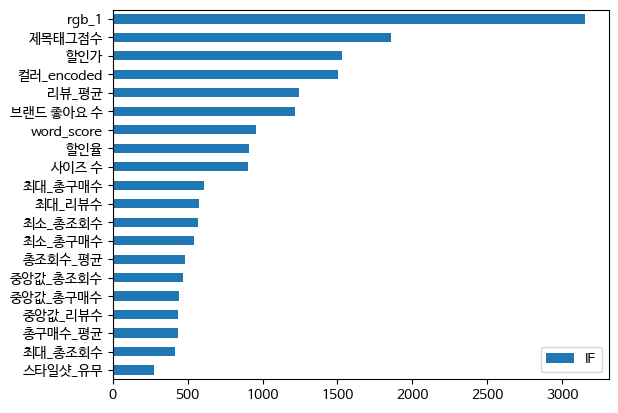

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.barh(X_train.columns, opt_lgbm.feature_importances_)
temp = pd.DataFrame(
    {
        "IF":opt_lgbm.feature_importances_
    },
    index = list(X_train.columns)
)
temp.sort_values( by="IF").plot(kind="barh")

Accuracy: 0.6029023746701847


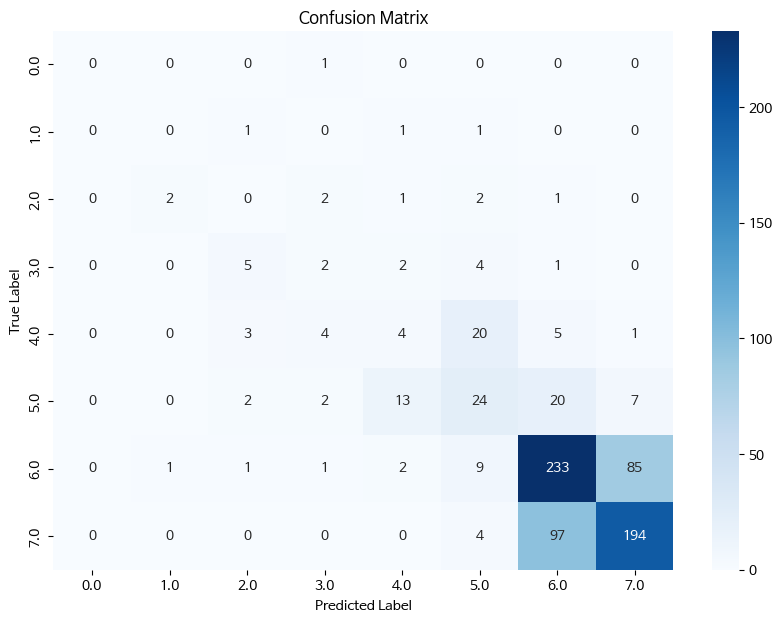

In [ ]:
# 혼동 행렬 시각화
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_val, y_pred)

# 데이터프레임으로 변환
conf_matrix_df = pd.DataFrame(conf_matrix, index=opt_lgbm.classes_, columns=opt_lgbm.classes_)

# 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


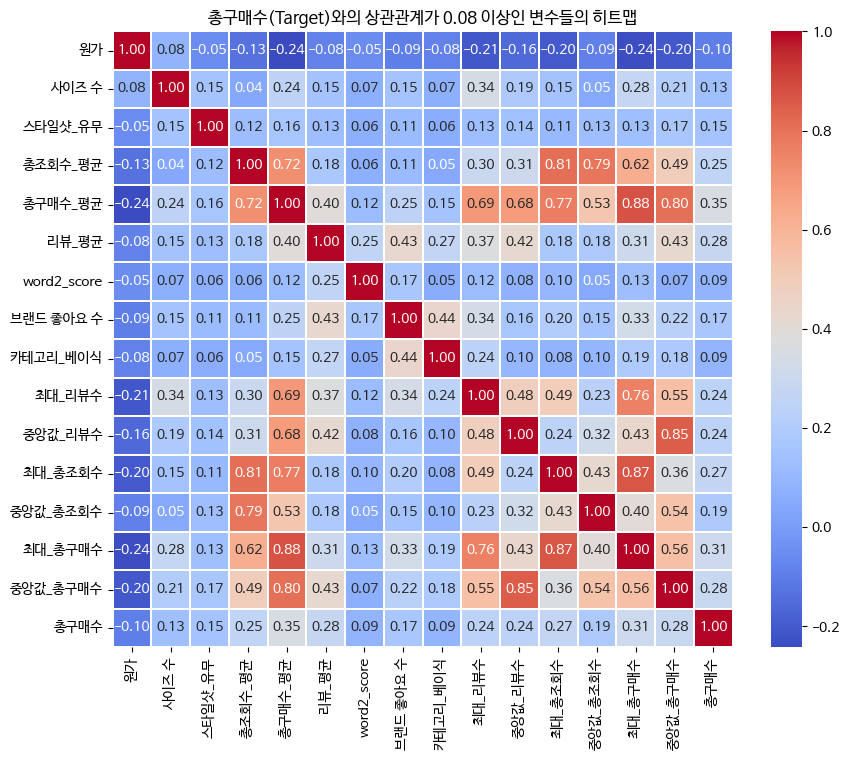

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/MyDrive/MyDrive/csv_file/ml_data_statistics_add.csv"
data = pd.read_csv(path,encoding='utf-8',index_col=0)

y= data.loc[:,"총구매수"]
X = data.drop(["브랜드", "제품명", "제품코드",'판매량등급'], axis=1)

# 종속변수 고정 (mpg)
dependent_var = data['총구매수']

# 나머지 변수 선택
independent_vars = data.drop(columns=["브랜드", "제품명", "제품코드",'판매량등급'])



# 종속변수(Target)를 데이터프레임에서 가장 오른쪽에 위치시킴
df = X[[col for col in X if col != '총구매수'] + ['총구매수']]
# 상관관계 계산
corr = df.corr()

# 총구매수(Target)와의 상관관계가 0.5 이상인 변수들만 선택
high_corr_with_target = corr['총구매수'][abs(corr['총구매수']) >= 0.08]

# 선택된 변수들에 대한 상관관계 행렬 추출
high_corr_vars = df[high_corr_with_target.index].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_vars, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('총구매수(Target)와의 상관관계가 0.08 이상인 변수들의 히트맵')
plt.show()
